In [1]:
import os
import numpy as np

from chainconsumer import Chain, ChainConsumer, Truth
import pandas as pd


from odisseo.option_classes import SimulationParams, MNParams, NFWParams, PlummerParams, PSPParams
from odisseo.units import CodeUnits

from astropy import units as u

In [2]:
code_length = 10 * u.kpc
code_mass = 1e4 * u.Msun
code_time = 3 * u.Gyr
code_units = CodeUnits(code_length, code_mass, G=1, unit_time = code_time )  

# set the simulation parameters, we can differentiate with respect to these parameters
params = SimulationParams(t_end = (3 * u.Gyr).to(code_units.code_time).value,  
                          Plummer_params= PlummerParams(Mtot=(10**4.05 * u.Msun).to(code_units.code_mass).value,
                                                        a=(8 * u.pc).to(code_units.code_length).value),
                           MN_params= MNParams(M = (68_193_902_782.346756 * u.Msun).to(code_units.code_mass).value,
                                              a = (3.0 * u.kpc).to(code_units.code_length).value,
                                              b = (0.280 * u.kpc).to(code_units.code_length).value),
                          NFW_params= NFWParams(Mvir=(4.3683325e11 * u.Msun).to(code_units.code_mass).value,
                                               r_s= (16.0 * u.kpc).to(code_units.code_length).value,),      
                          PSP_params= PSPParams(M = 4501365375.06545 * u.Msun.to(code_units.code_mass),
                                                alpha = 1.8, 
                                                r_c = (1.9*u.kpc).to(code_units.code_length).value),                    
                          G=code_units.G, ) 

In [6]:
sample_dir = './sampling_ScipyMinimize/ScipyBoundedMinimize/'
sample_files = [os.path.join(sample_dir, s) for s in os.listdir(sample_dir)]
samples = np.array([np.load(s)['sample'] for s in sample_files])
print(samples.shape)
df_sample = pd.DataFrame(samples, columns=['t_end', 'M_plummer', 'a_plummer', 'Mvir', 'rs_NFW', 'M_MN', 'a_MN'])
df_sample['t_end'] = df_sample['t_end'] * code_units.code_time.to(u.Gyr)
df_sample['M_plummer'] = 10**df_sample['M_plummer'] * code_units.code_mass.to(u.Msun)
df_sample['a_plummer'] = df_sample['a_plummer'] * code_units.code_length.to(u.pc)
df_sample['Mvir'] = 10**df_sample['Mvir'] * code_units.code_mass.to(u.Msun)
df_sample['rs_NFW'] = df_sample['rs_NFW'] * code_units.code_length.to(u.kpc)
df_sample['M_MN'] = 10**df_sample['M_MN'] * code_units.code_mass.to(u.Msun)
df_sample['a_MN'] = df_sample['a_MN'] * code_units.code_length.to(u.kpc)


(891, 7)


Parameter t_end in chain ScipyMinimize is not constrained
Parameter a_plummer in chain ScipyMinimize is not constrained
Parameter Mvir in chain ScipyMinimize is not constrained
Parameter M_MN in chain ScipyMinimize is not constrained
Parameter a_MN in chain ScipyMinimize is not constrained


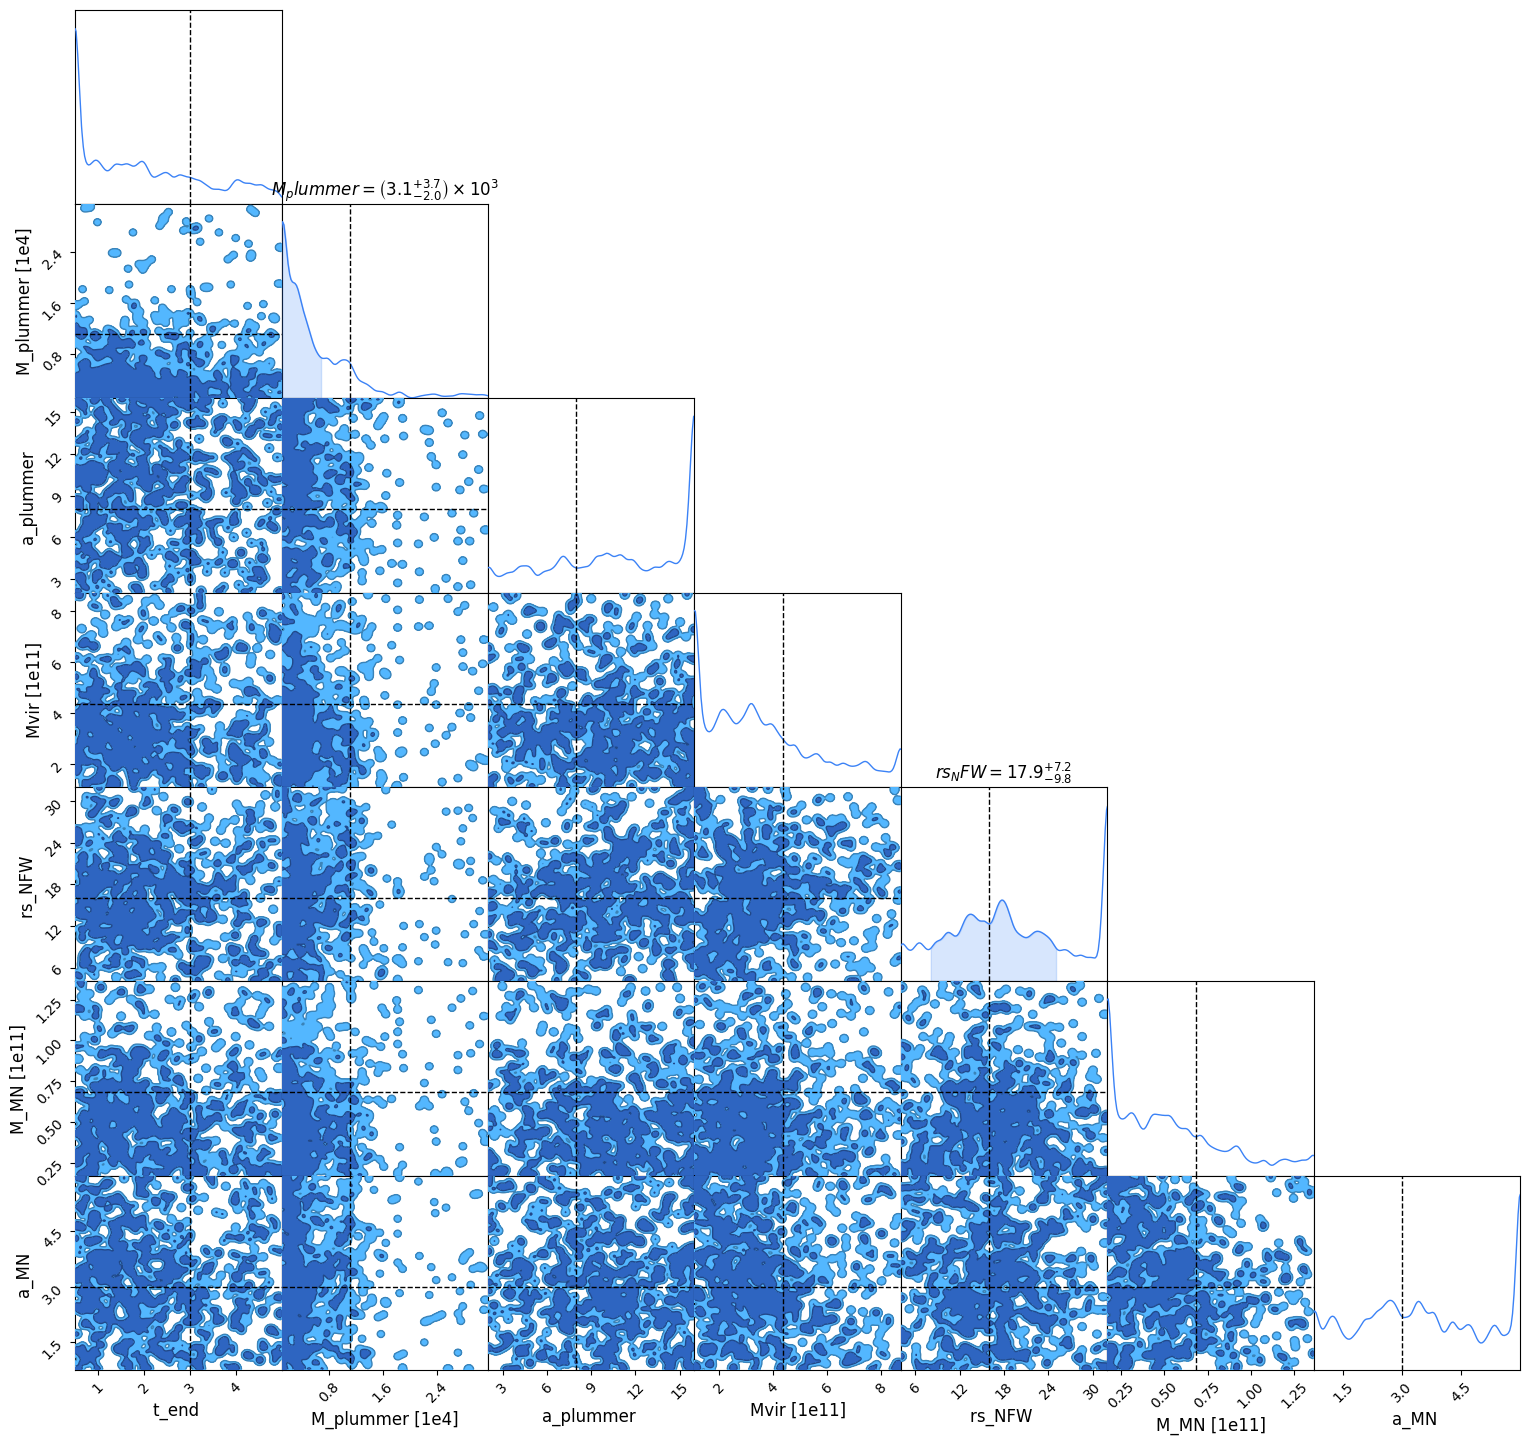

In [ ]:
#plot

c = ChainConsumer()
c.add_chain(Chain(samples=df_sample, name='ScipyBoundedMinimize'))
c.add_truth(Truth(location={'t_end': params.t_end * code_units.code_time.to(u.Gyr),
                           'M_plummer': params.Plummer_params.Mtot * code_units.code_mass.to(u.Msun),
                           'a_plummer': params.Plummer_params.a * code_units.code_length.to(u.pc),
                           'Mvir': params.NFW_params.Mvir * code_units.code_mass.to(u.Msun),
                           'rs_NFW': params.NFW_params.r_s * code_units.code_length.to(u.kpc),
                           'M_MN': params.MN_params.M * code_units.code_mass.to(u.Msun),
                           'a_MN': params.MN_params.a *code_units.code_length.to(u.kpc),}))
fig = c.plotter.plot()